In [ ]:
## Linear Regression Models : Dr N Subhash Chandra

## The dataset is a CSV (comma-separated values) file, which contains the hours studied and the scores obtained based on those hours. We'll load the data into a DataFrame using Pandas:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Let's read the CSV file and package it into a DataFrame:

In [2]:
df = pd.read_csv('student_scores.csv')

## let's take a quick peek at the first 5 values using the head() method:

In [4]:
print(df.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


##check the shape of our dataset via the shape property

In [4]:
df.shape

(25, 2)

## plot the hours on the X-axis and scores on the Y-axis, and for each pair, a marker will be positioned based on their values

<AxesSubplot:title={'center':'Scatterplot of hours and scores percentages'}, xlabel='Hours', ylabel='Scores'>

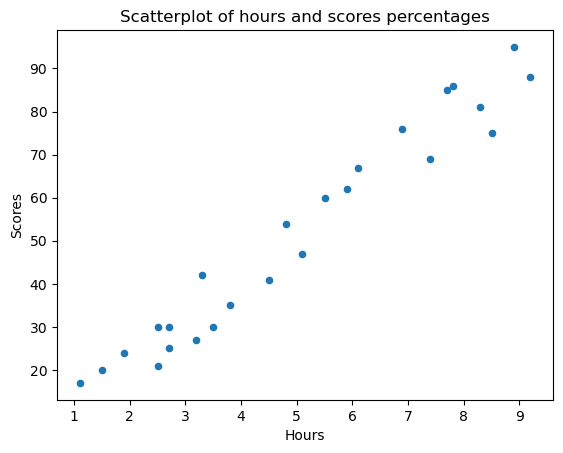

In [5]:
#plt.scatter(x=df['Hours'], y=df['Scores'])
#plt.title('Scatterplot of hours and scores percentages')

df.plot.scatter(x='Hours', y='Scores', title='Scatterplot of hours and scores percentages')

##There's a positive linear correlation between the Hours and Scores variables. How correlated are they? The corr() method calculates and displays the correlations between numerical variables in a DataFrame:

In [6]:
print(df.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


##Pandas also ships with a great helper method for statistical summaries, and we can describe() the dataset to get an idea of the mean, maximum, minimum, etc. values of our columns

In [6]:
print(df.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


##To separate the target and features, we can attribute the dataframe column values to our y and X variables:

In [10]:
y = df['Scores'].values.reshape(-1, 1)
X = df['Hours'].values.reshape(-1, 1)

In [11]:
print('X shape:', X.shape)
print('X:', X)

X shape: (25, 1)
X: [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [12]:
print(df['Hours'].values) # [2.5 5.1 3.2 8.5 3.5 1.5 9.2 ... ]
print(df['Hours'].values.shape) # (25,)

[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
 6.1 7.4 2.7 4.8 3.8 6.9 7.8]
(25,)


##train_test_split() method, which accepts our X and y arrays (also works on DataFrames and splits a single DataFrame into training and testing sets), and a test_size. The test_size is the percentage of the overall data we'll be using for testing:
Since the sampling process is inherently random, we will always have different results when running the method. To be able to have the same results, or reproducible results, we can define a constant called SEED that has the value of the meaning of life (42)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [14]:
print(y_train)

[[25]
 [42]
 [47]
 [35]
 [20]
 [27]
 [41]
 [95]
 [75]
 [30]
 [30]
 [24]
 [54]
 [67]
 [86]
 [60]
 [85]
 [17]
 [69]
 [88]]


##Scikit-Learn has a plethora of model types we can easily import and train, LinearRegression being one of them. to fit the line to our data, we will do that by using the .fit() method along with our X_train and y_train data:

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [18]:
print(regressor.intercept_)

[2.82689235]


In [19]:
print(regressor.coef_)

[[9.68207815]]


In [ ]:
## Making Predictions

In [20]:
def calc(slope, intercept, hours):
    return slope*hours+intercept

In [21]:
score = calc(regressor.coef_, regressor.intercept_, 9.5)
print(score)

[[94.80663482]]


In [22]:
score = regressor.predict([[9.5]])
print(score)

[[94.80663482]]


In [23]:
y_pred = regressor.predict(X_test)

In [24]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

   Actual  Predicted
0      81  83.188141
1      30  27.032088
2      21  27.032088
3      76  69.633232
4      62  59.951153


## Evaluating the Model

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
## print the metrics results using the f string and the 2 digit precision after the comma with :.2f

In [28]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 3.92
Mean squared error: 18.94
Root mean squared error: 4.35


In [ ]:
## Multi Linear Regression model

In [29]:
df = pd.read_csv('petrol_consumption.csv')

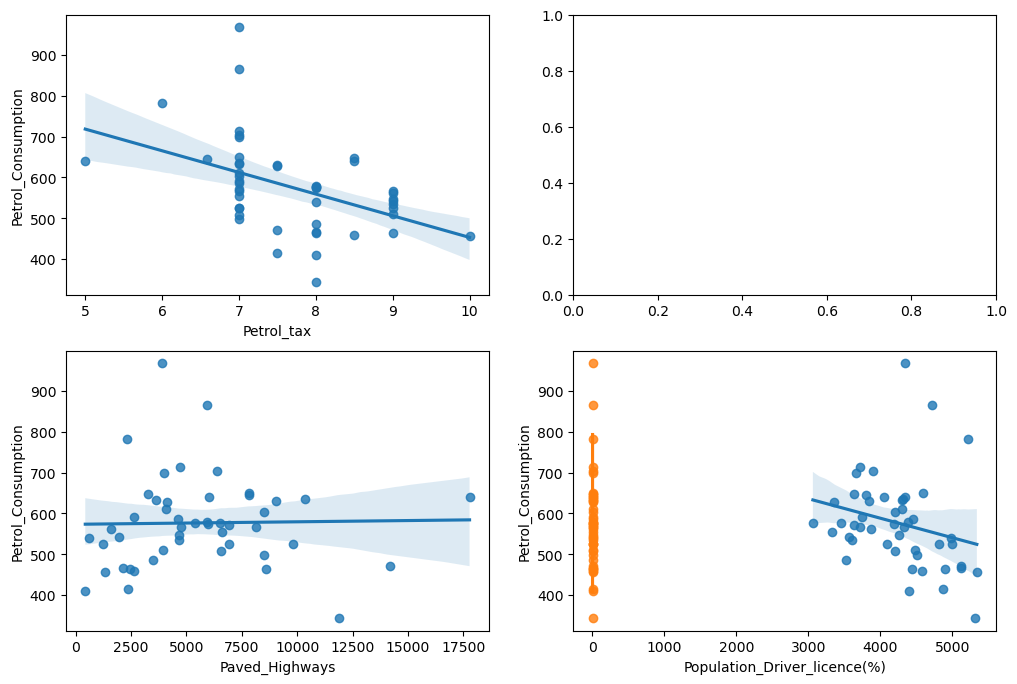

In [30]:
import seaborn as sns # Convention alias for Seaborn

variables = ['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

for index, var in enumerate(variables):
    # Regression Plot also by default includes
    # best-fitting regression line
    # which can be turned off via `fit_reg=False`
    sns.regplot(x=var, y='Petrol_Consumption', data=df, ax=ax[int(np.ceil(index/4))][int(np.mod(index, 2))])

##When looking at the regplots, it seems the Petrol_tax and Average_income have a weak negative linear relationship with Petrol_Consumption. It also seems that the Population_Driver_license(%) has a strong positive linear relationship with Petrol_Consumption, and that the Paved_Highways variable has no relationship with Petrol_Consumption.

##calculate the correlation of the new variables, this time using Seaborn's heatmap() to help us spot the strongest and weaker correlations based on warmer (reds) and cooler (blues) tones:

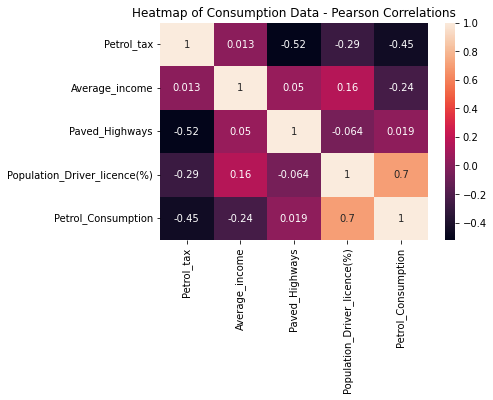

In [24]:
correlations = df.corr()
# annot=True displays the correlation values
sns.heatmap(correlations, annot=True).set(title='Heatmap of Consumption Data - Pearson Correlations');

##Preparation of data

In [31]:
y = df['Petrol_Consumption']
X = df[['Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_tax']]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [33]:
X.shape # (48, 4)

(48, 4)

In [34]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [35]:
regressor.intercept_

361.4508790666836

In [36]:
regressor.coef_

array([-5.65355145e-02, -4.38217137e-03,  1.34686930e+03, -3.69937459e+01])

In [37]:
feature_names = X.columns

In [38]:
feature_names = X.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
print(coefficients_df)

                              Coefficient value
Average_income                        -0.056536
Paved_Highways                        -0.004382
Population_Driver_licence(%)        1346.869298
Petrol_tax                           -36.993746


In [39]:
y_pred = regressor.predict(X_test)

In [40]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

    Actual   Predicted
27     631  606.692665
40     587  673.779442
26     577  584.991490
43     591  563.536910
24     460  519.058672
37     704  643.461003
12     525  572.897614
19     640  687.077036
4      410  547.609366
25     566  530.037630


In [41]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 53.47
Mean squared error: 4083.26
Root mean squared error: 63.90


In [42]:
actual_minus_predicted = sum((y_test - y_pred)**2)
actual_minus_actual_mean = sum((y_test - y_test.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)

R²: 0.3913664001430537


In [43]:
regressor.score(X_test, y_test)

0.3913664001430538

In [ ]:
##our current model explains only 39% of our test data which is not a good result,
##it means it leaves 61% of the test data unexplained

In [ ]:
##Let's also understand how much our model explains of our train data:

In [44]:
regressor.score(X_train, y_train)

0.7068781342155135